In [230]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
str = "Psychedelic mushroom hoodie | Magic mushroom hoodie | Trippy mushroom clothing | Psychedelic art apparel | Fungi fashion | Psilocybin clothing | Psychedelic mushroom graphic hoodie | Mushroom art hood"
lst = str.split("|")
lst
for i in range(len(lst)):
    print(lst[i])

Psychedelic mushroom hoodie 
 Magic mushroom hoodie 
 Trippy mushroom clothing 
 Psychedelic art apparel 
 Fungi fashion 
 Psilocybin clothing 
 Psychedelic mushroom graphic hoodie 
 Mushroom art hood


In [208]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Highly correlated values
I know there are none from doing the lab in week 2, I'll do the correlation matrix anyways...

In [209]:
# create dataframes with numerical...
df_num = df[df.select_dtypes(include=[np.number]).columns]
# ...and categorical data only
df_cat = df[df.select_dtypes(include=[object]).columns]

# define numerical column index
num_cols = df_num.columns
# define categorical column index
cat_cols = df_cat.columns

corr = df_num[num_cols].corr()

In [210]:
thresh = 0.9
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > thresh:
            colname = corr.columns[i]
            correlated_features.add(colname)

# Display the correlated features
print("Correlated features:", correlated_features)

Correlated features: set()


In [211]:
df_cat = df_cat.drop('effective_to_date', axis=1)

In [212]:
# get unique identifiers of the regions

# Create a dictionary that maps each unique region to an integer
ed_map = {"high school or below": 0, "college":1, "bachelor": 1,"master":2, "doctor":3}
ed_map
# Replace the values in the "region" column with their mapped integers
df_cat['education'] = df_cat['education'].map(ed_map)

In [213]:
# same for coverage
covs = df_cat["coverage"].unique()

cov_map = {coverage: i for i, coverage in enumerate(covs)}

df_cat["coverage"] = df_cat["coverage"].map(cov_map)

In [214]:
# same for vehicle size
sizes = {"small" : 0, "medsize" : 1, "large" : 2}

size_map = {size: i for i, size in enumerate(sizes)}

df_cat["vehicle_size"] = df_cat["vehicle_size"].map(size_map)

In [215]:
# create dummy variables
# for all non-ordinal columns
cols_to_dummify = df_cat.columns.drop(["coverage","education","vehicle_size"])

for i, col in enumerate(cols_to_dummify):
    df_dummies = pd.get_dummies(df_cat[col], drop_first=1)
    # concatenate the original dataframe with the dummy variables
    df_dums = pd.concat([df_dums, df_dummies], axis=1)

In [216]:
df_done = pd.concat([df_cat[["coverage","education","vehicle_size"]], df_dums], axis=1)

In [217]:
df_done

,coverage,education,vehicle_size,east,north west,west region,yes,jan,employed,medical leave,...,offer3,offer4,branch,call center,web,luxury car,luxury suv,sports car,suv,two-door car
0,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,1,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,2,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
adf = pd.concat([df_cat, df_num], axis=1)

# Optional

In [219]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [260]:
# import required libraries
from sklearn import linear_model
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

scale = MinMaxScaler()

X = df_num[["customer_lifetime_value"]]

scaledX = scale.fit_transform(X)

display(X, scaledX)

,customer_lifetime_value
0,4809
1,2228
2,14947
3,22332
4,9025
...,...
10684,15563
10685,5259
10686,23893
10687,11971


array([[0.03574981],
       [0.00405271],
       [0.16025397],
       ...,
       [0.27011925],
       [0.1237059 ],
       [0.06090118]])

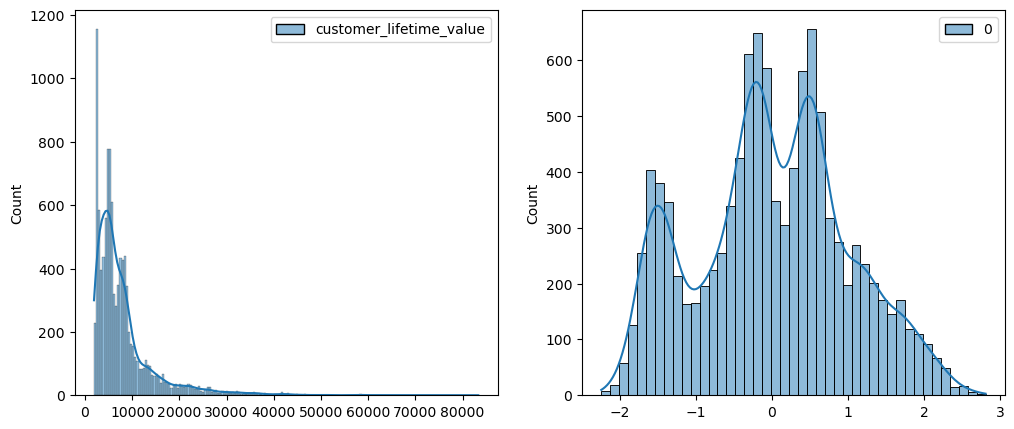

In [258]:
# plot X against scaledX to verify the rescaling
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the first distribution
sns.histplot(data=X, kde=True, ax=ax[0])

# Plot the second distribution
sns.histplot(data=scaledX, kde=True, ax=ax[1])

# Adjust the plot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [259]:
print(scaledX.std(), scaledX.mean())

1.0000000000000002 4.18787467049175e-15


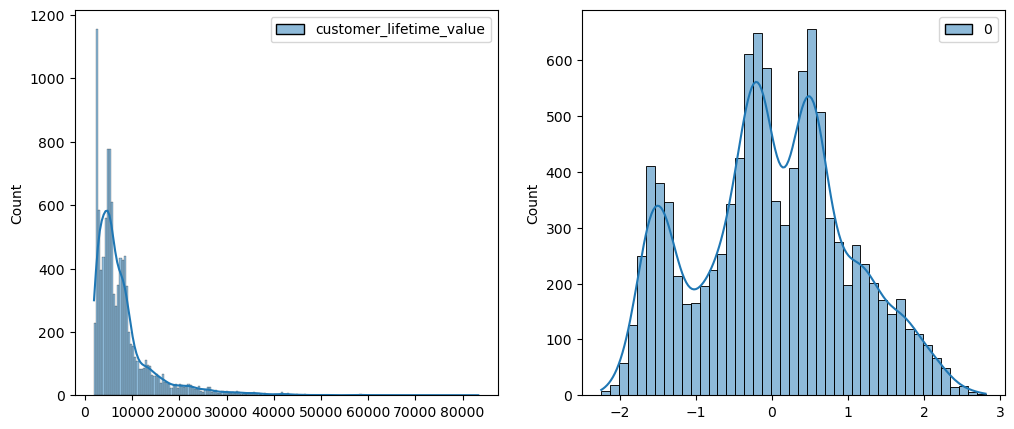

In [255]:
scale = PowerTransformer(method="box-cox")

X = df_num[["customer_lifetime_value"]]

scaledX = scale.fit_transform(X)

#print(X,scaledX)

# plot X against scaledX to verify the rescaling
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the first distribution
sns.histplot(data=X, kde=True, ax=ax[0])

# Plot the second distribution
sns.histplot(data=scaledX, kde=True, ax=ax[1])

# Adjust the plot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [253]:
print(scaledX.std(), scaledX.mean())

1.0000000000000002 4.18787467049175e-15


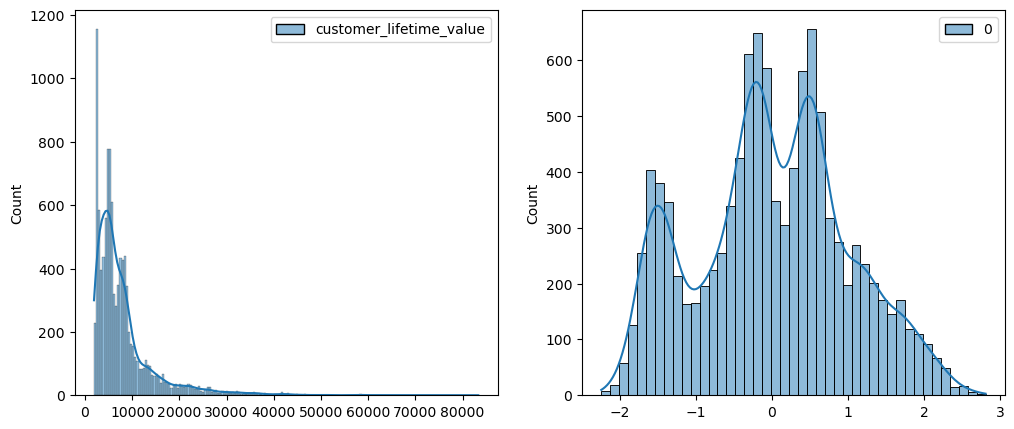

In [256]:
scale = PowerTransformer(method="yeo-johnson")

X = df_num[["customer_lifetime_value"]]

scaledX = scale.fit_transform(X)

#print(X,scaledX)

# plot X against scaledX to verify the rescaling
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the first distribution
sns.histplot(data=X, kde=True, ax=ax[0])

# Plot the second distribution
sns.histplot(data=scaledX, kde=True, ax=ax[1])

# Adjust the plot layout
#plt.tight_layout()

# Show the plot
plt.show()

In [257]:
print(scaledX.std(), scaledX.mean())

1.0000000000000002 4.18787467049175e-15


The difference between the options "box-cox" and "yeo-johnson" is that the former requires strictly positive input data while the latter takes both positive and negative values.